In [29]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plothist


In [134]:
# set the path 
particles = ['e','kaon','pi','mu']
distances = ['14.0','15.0','16.0','17.0','18.0','19.0','20.0','21.0']
data_path = './output/'
fig_path = './figs/'

Gt_cuts = {'14.0':0.75,'15.0':0.8,'16.0':0.8,'17.0':0.85,'18.0':0.85,'19.0':0.9,'20.0': 0.95,'21.0': 1.0}

In [135]:
# read in the ntuples 
files = {}
for d in distances:
    files[f'd_{d}'] = {}
    for p in particles:
        filename = f"{data_path}Silicon_{p}_-{d}.root"
        try:
            root_file = uproot.open(filename)
            tree = root_file["HitNtuple"]  # update name if different
            df = tree.arrays(library="pd")
            files[f'd_{d}'][f'p_{p}'] = df
            print(f"Loaded: {filename}")
        except Exception as e:
            print(f"Failed to load {filename}: {e}")

Loaded: ./output/Silicon_e_-14.0.root
Loaded: ./output/Silicon_kaon_-14.0.root
Loaded: ./output/Silicon_pi_-14.0.root
Loaded: ./output/Silicon_mu_-14.0.root
Loaded: ./output/Silicon_e_-15.0.root
Loaded: ./output/Silicon_kaon_-15.0.root
Loaded: ./output/Silicon_pi_-15.0.root
Loaded: ./output/Silicon_mu_-15.0.root
Loaded: ./output/Silicon_e_-16.0.root
Loaded: ./output/Silicon_kaon_-16.0.root
Loaded: ./output/Silicon_pi_-16.0.root
Loaded: ./output/Silicon_mu_-16.0.root
Loaded: ./output/Silicon_e_-17.0.root
Loaded: ./output/Silicon_kaon_-17.0.root
Loaded: ./output/Silicon_pi_-17.0.root
Loaded: ./output/Silicon_mu_-17.0.root
Loaded: ./output/Silicon_e_-18.0.root
Loaded: ./output/Silicon_kaon_-18.0.root
Loaded: ./output/Silicon_pi_-18.0.root
Loaded: ./output/Silicon_mu_-18.0.root
Loaded: ./output/Silicon_e_-19.0.root
Loaded: ./output/Silicon_kaon_-19.0.root
Loaded: ./output/Silicon_pi_-19.0.root
Loaded: ./output/Silicon_mu_-19.0.root
Loaded: ./output/Silicon_e_-20.0.root
Loaded: ./output/Sil

/var/folders/4c/n9s685pn4xb2d2lggqkkvb2r0000gn/T/ipykernel_7275/416025214.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(dpi=100)


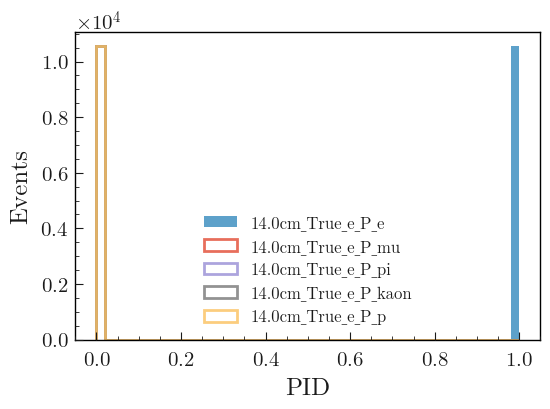

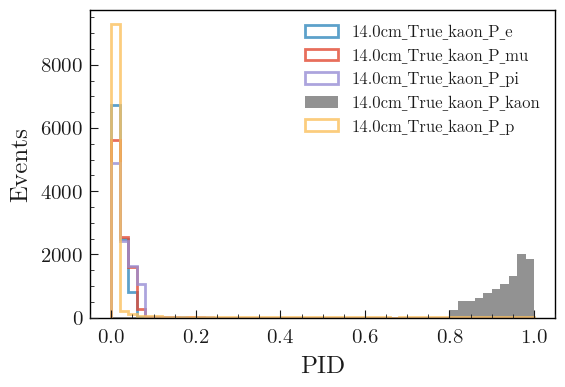

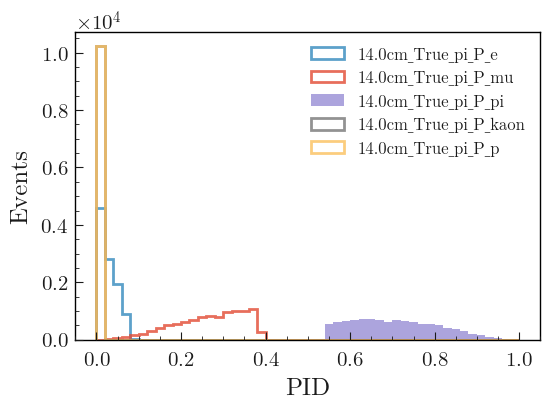

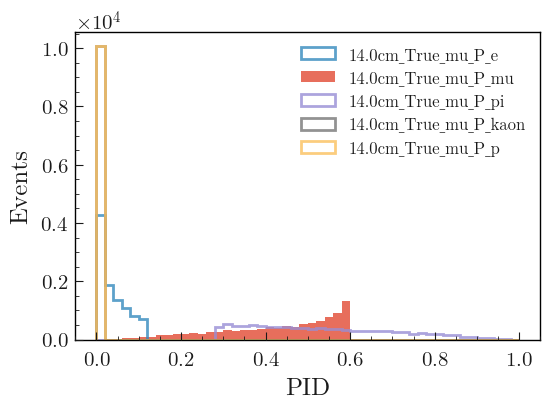

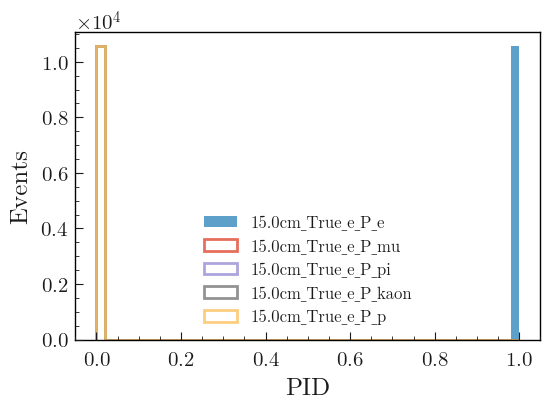

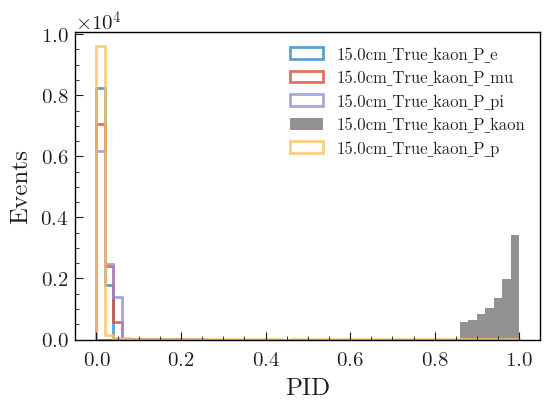

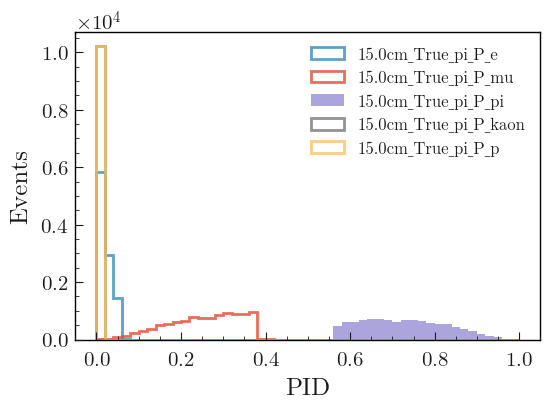

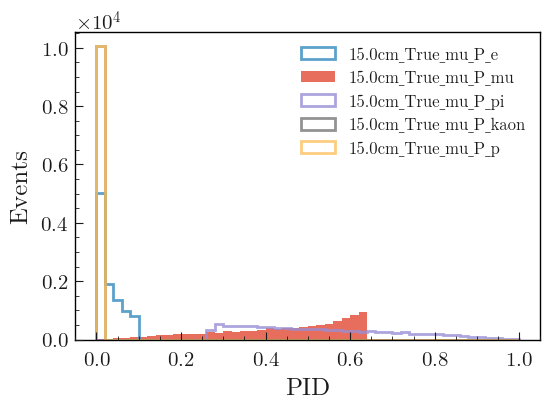

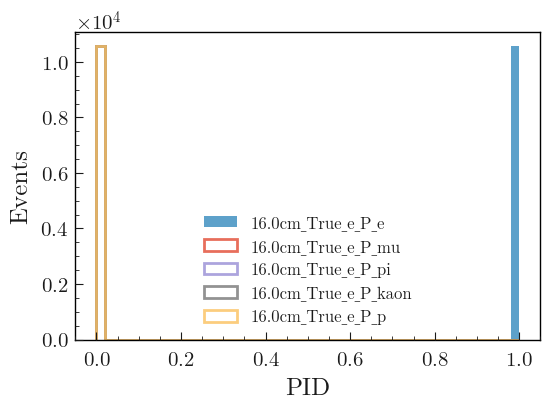

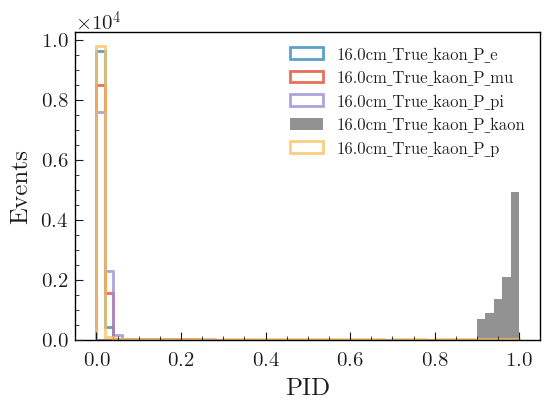

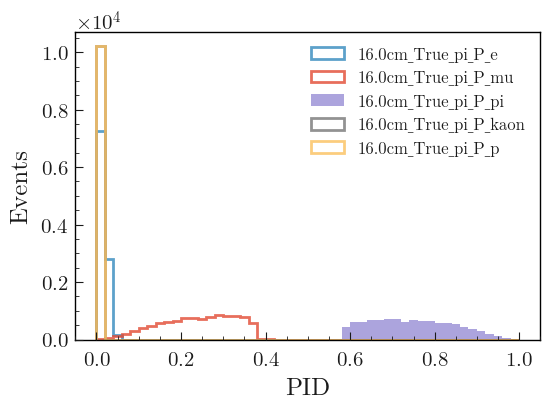

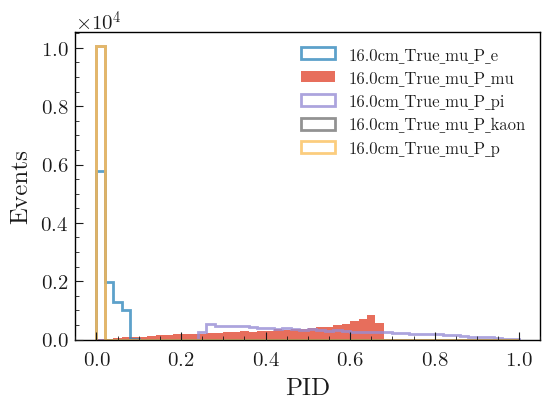

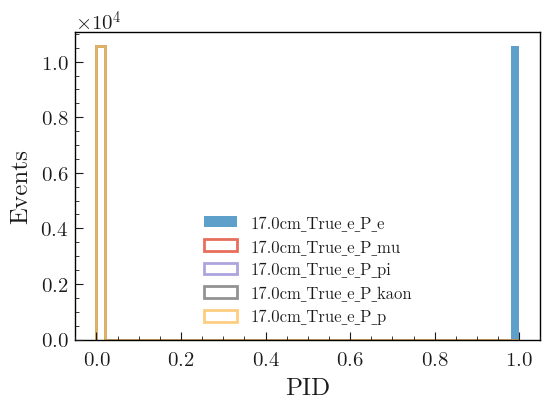

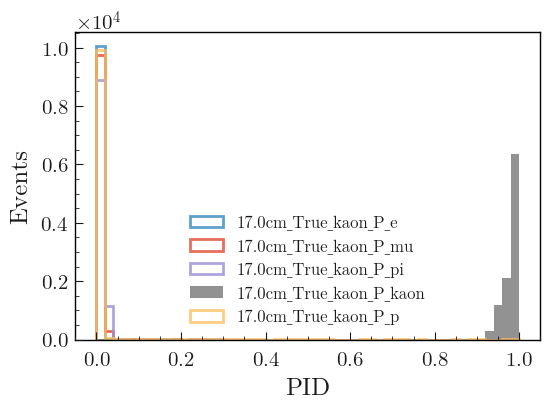

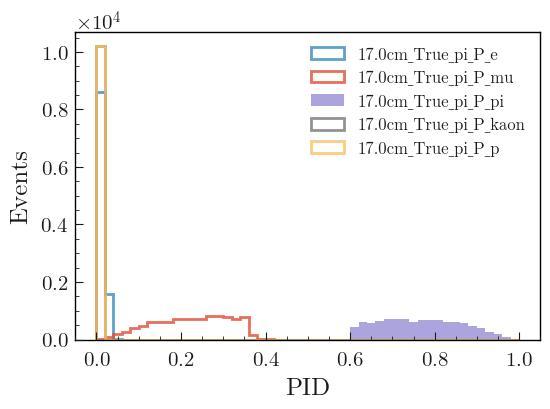

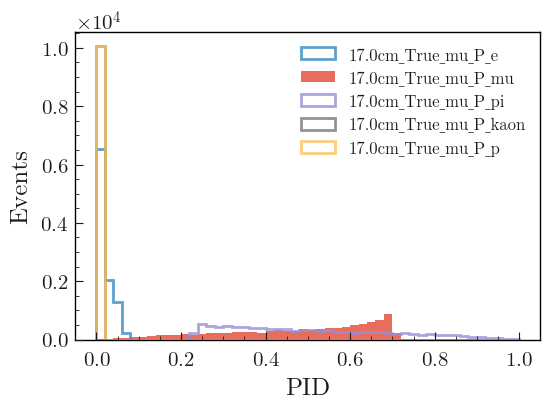

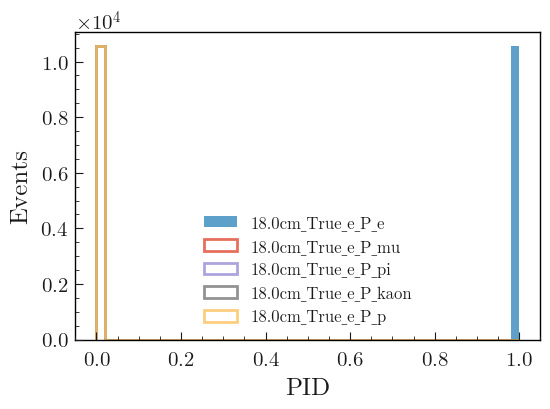

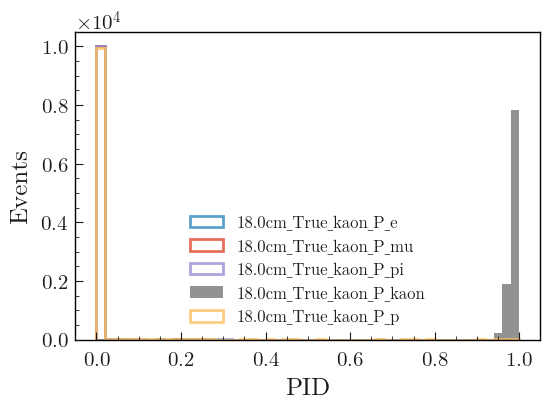

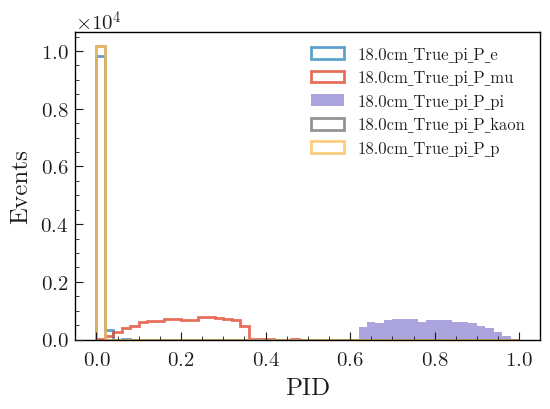

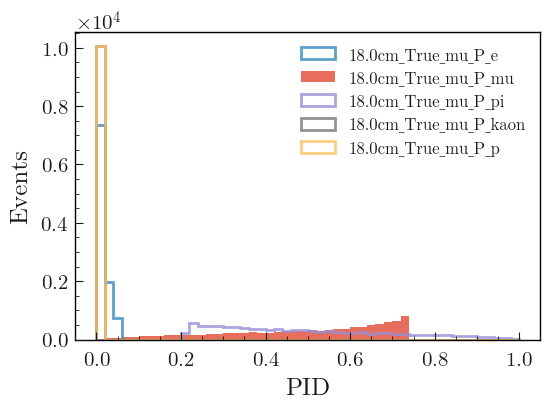

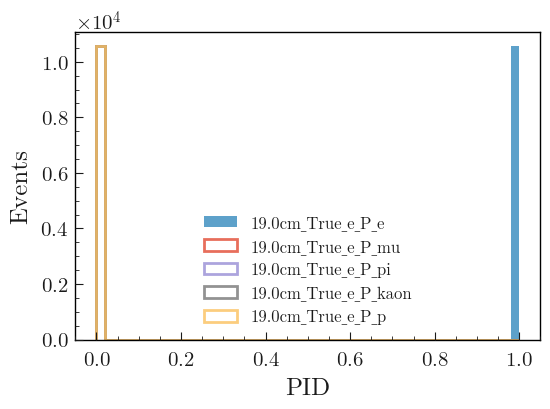

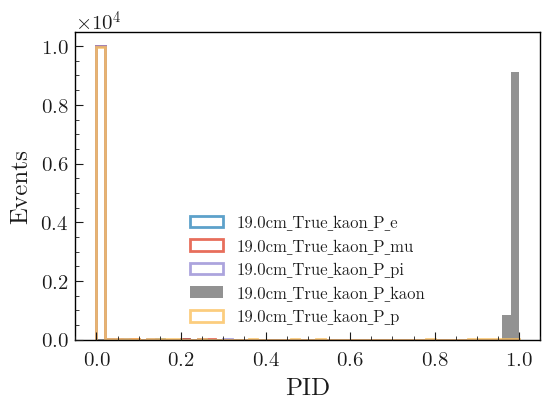

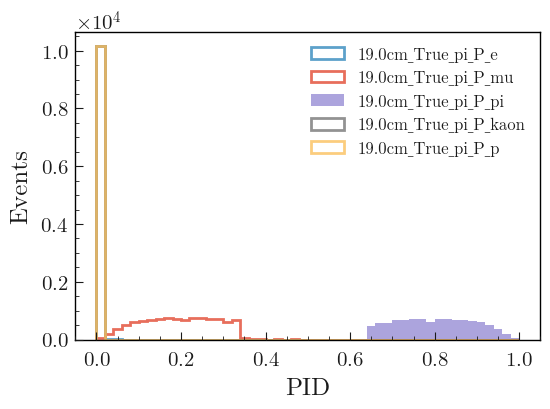

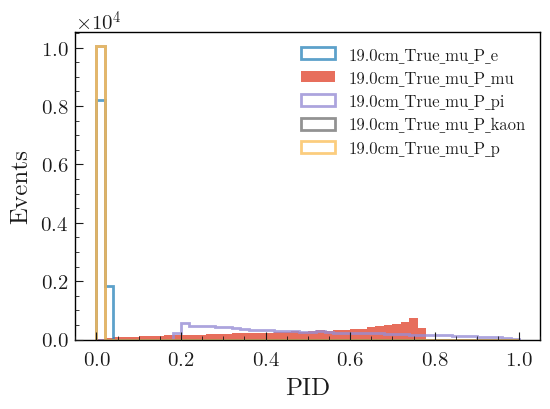

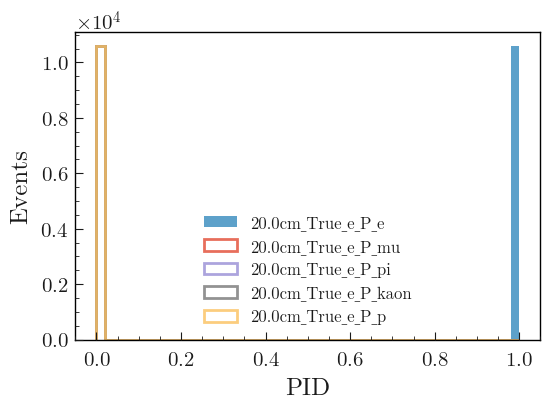

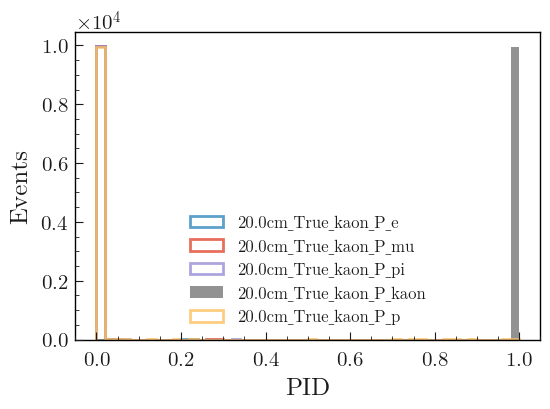

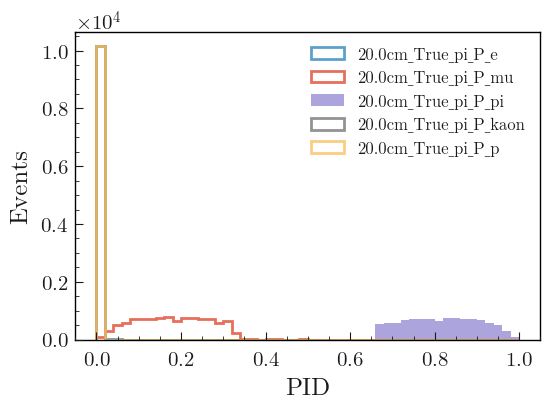

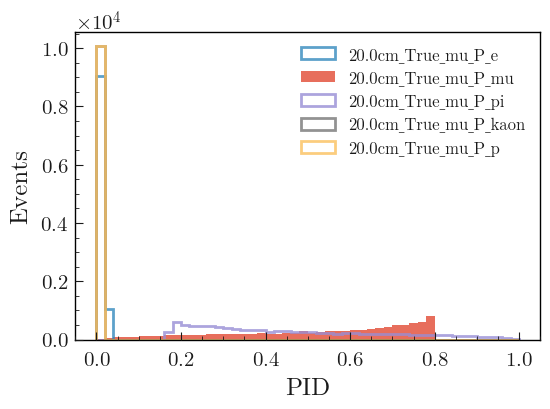

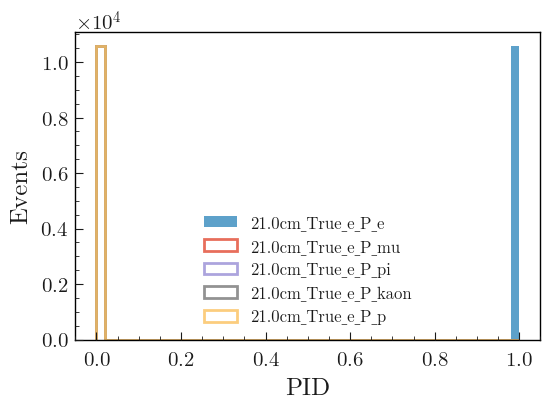

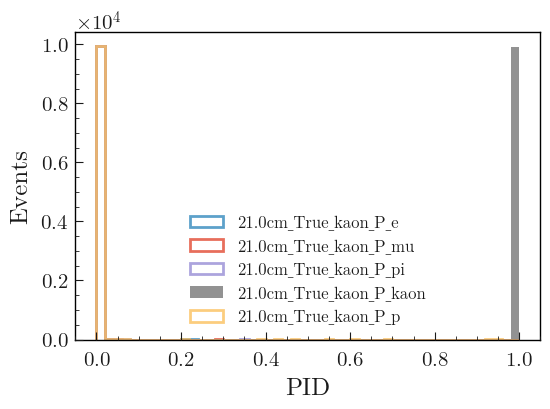

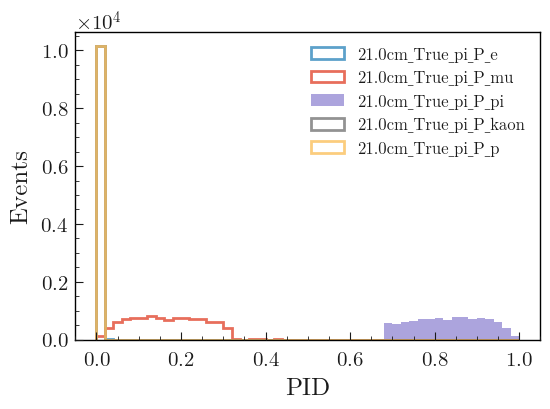

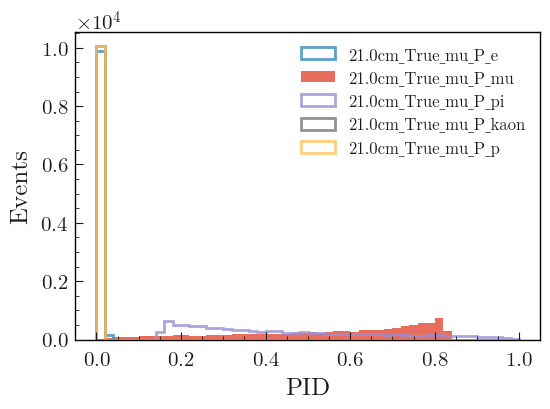

In [136]:
# check the PID 
for d in distances:
    for p in particles:
        plt.figure(dpi=100)
        for i in ['P_e','P_mu','P_pi','P_kaon','P_p']:
            histStyle = 'step'
            if f'_{p}' in i:
                histStyle = 'stepfilled' 
            plt.hist(files[f'd_{d}'][f'p_{p}'].query(f'layer==0 and Gtime<{Gt_cuts[d]}')[i],linewidth=2,histtype=histStyle,bins=50, range=(0.,1.0),  
                 label =f'{d}cm_True_{p}_{i}', alpha =0.8)
            
        plt.legend()
        plt.xlabel('PID')
        plt.ylabel('Events')
        plt.savefig(f'{fig_path}d_-{d}cm_True_{p}.pdf',bbox_inches='tight')
        
        

Text(0.5, 0, 'HitPathLength_fromTrack [mm]')

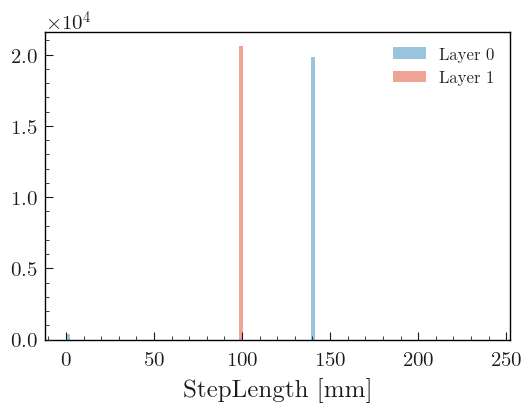

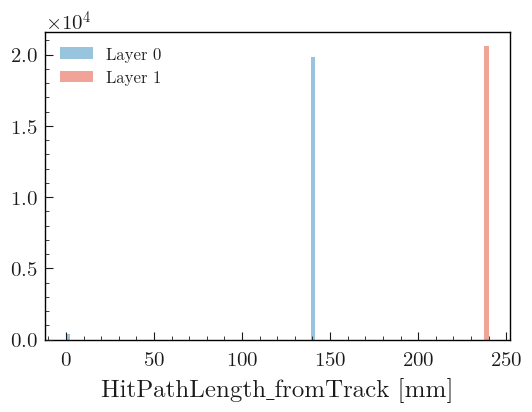

In [34]:
df_mu = files[f'd_14.0'][f'p_mu']
plt.hist(df_mu.query('layer==0 ')['StepLength'], bins=100, range=(0.,240.0),alpha =0.5, label ='Layer 0')
plt.hist(df_mu.query('layer==1 ')['StepLength'], bins=100, range=(0.,240.0),alpha =0.5, label ='Layer 1')
plt.legend()
plt.xlabel('StepLength [mm]')
plt.figure()
plt.hist(df_mu.query('layer==0 ')['HitPathLength_fromTrack'], bins=100, range=(0.,240.0),alpha =0.5, label ='Layer 0')
plt.hist(df_mu.query('layer==1 ')['HitPathLength_fromTrack'], bins=100, range=(0.,240.0),alpha =0.5, label ='Layer 1')
plt.legend()
plt.xlabel('HitPathLength_fromTrack [mm]')

Text(0.5, 0, 'Time ')

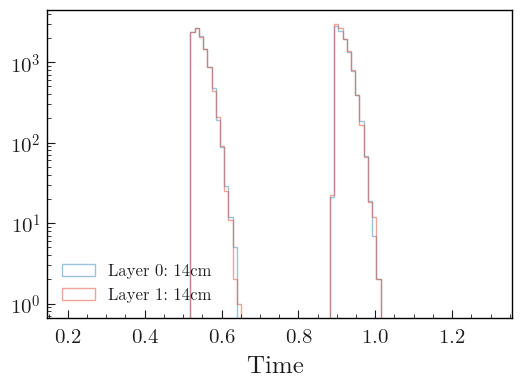

In [138]:

# plt.hist(df_mu.query('layer==0 ')['charge'], bins=100, range=(0.,0.001),alpha =0.5, label ='Layer 0')
# plt.hist(df_mu.query('layer==1 ')['charge'], bins=100, range=(0.,0.001),alpha =0.5, label ='Layer 1')
# plt.figure(dpi=100, figsize=(10,5))
# for d in distances:
#     plt.figure(dpi=100, figsize=(10,5))
#     for p in particles:

#         plt.hist(files[f'd_{d}'][f'p_{p}'].query('layer==0')['Gtime_smeared'], bins=100,  histtype='step',range=(0.2,1.3),alpha =0.5, label =f'Layer 0: {d} {p}')
#         # plt.hist(files[f'd_{d}'][f'p_{p}'].query('layer==1 ')['Gtime_smeared'], bins=100,  histtype='step',range=(0.2,1.3),alpha =0.5, label =f'Layer 1: {d}')
# # plt.hist(df_mu.query('layer==0 ')['Gtime'], bins=100, histtype='stepfilled',range=(0.2,1.3),alpha =0.5, label ='Layer 0')
# # plt.hist(df_mu.query('layer==1 ')['Gtime'], bins=100, histtype='stepfilled',range=(0.2,1.3),alpha =0.5, label ='Layer 1')
#     plt.legend()
#     plt.yscale('log')
#     plt.xlabel('Time ')

df_mu = files[f'd_14.0'][f'p_mu']
plt.figure()
plt.hist(df_mu.query('layer==0 ')['Gtime_smeared'], bins=100,  histtype='step',range=(0.2,1.3),alpha =0.5, label ='Layer 0: 14cm')
plt.hist(df_mu.query('layer==1 ')['Gtime_smeared'], bins=100,  histtype='step',range=(0.2,1.3),alpha =0.5, label ='Layer 1: 14cm')
# plt.hist(df_mu.query('layer==0 ')['Gtime'], bins=100, histtype='stepfilled',range=(0.2,1.3),alpha =0.5, label ='Layer 0')
# plt.hist(df_mu.query('layer==1 ')['Gtime'], bins=100, histtype='stepfilled',range=(0.2,1.3),alpha =0.5, label ='Layer 1')
plt.legend()
plt.yscale('log')
plt.xlabel('Time ')

# plt.figure()

# plt.hist(files[f'd_19.0'][f'p_mu'].query('layer==0 ')['MomIn'], bins=100, histtype='stepfilled',range=(0.,1500.0),alpha =0.5, label ='$\mu$')
# plt.hist(files[f'd_19.0'][f'p_pi'].query('layer==0 ')['MomIn'], bins=100, histtype='stepfilled',range=(0.0,1500.0),alpha =0.5, label ='$\pi$')
# plt.hist(files[f'd_19.0'][f'p_e'].query('layer==0 ')['MomIn'], bins=100, histtype='stepfilled',range=(0.0,1500.0),alpha =0.5, label ='$e$')
# # plt.hist(files[f'd_19.0'][f'p_p'].query('layer==0 ')['MomIn'], bins=100, histtype='stepfilled',range=(0.0,500.0),alpha =0.5, label ='p')
# plt.hist(files[f'd_19.0'][f'p_kaon'].query('layer==0 ')['MomIn'], bins=100, histtype='stepfilled',range=(0.0,1500.0),alpha =0.5, label ='$K$')
# plt.legend()
# plt.yscale('log')
# plt.xlabel('MomIn [MeV/c] ')

In [139]:
def plot_profile(df, x_l,y_l,binx,biny,rangex,rangey,pref,fmt='.'): 
    x=df[x_l]
    y=df[y_l]
    h, xedges, yedges  = np.histogram2d(y=y,x=x, bins=[binx, biny], range=[rangex, rangey])
    xcenters = (xedges[:-1] + xedges[1:]) / 2
    ycenters = (yedges[:-1] + yedges[1:]) / 2
    
    # Compute mean and standard deviation for each bin
    mean_values = np.zeros(binx)
    std_errors = np.zeros(binx)
    
    for i in range(binx):
        mask = (x >= xedges[i]) & (x < xedges[i + 1])
        values_in_bin = y[mask]
        if len(values_in_bin) > 0:
            mean_values[i] = np.mean(values_in_bin)
            std_errors[i] = np.std(values_in_bin) / np.sqrt(len(values_in_bin))
        else:
            mean_values[i] = np.nan
            std_errors[i] = np.nan
    
    plt.errorbar(xcenters, mean_values, yerr=std_errors, fmt=fmt, label=f'{pref}_{y_l}')
    plt.xlabel(x_l)
    plt.ylabel('probabilities')
    return xcenters, mean_values, std_errors

<Figure size 600x400 with 0 Axes>

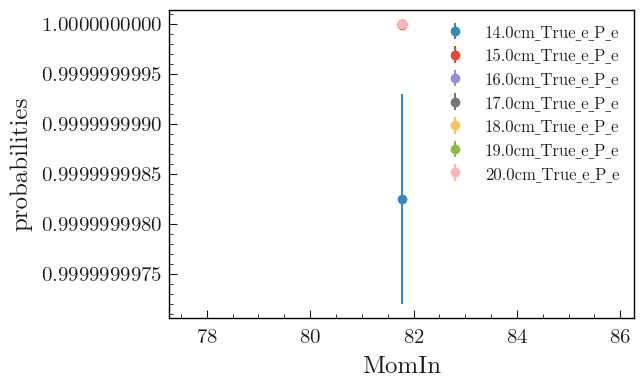

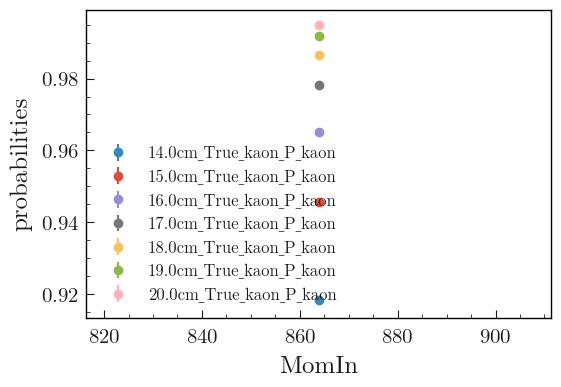

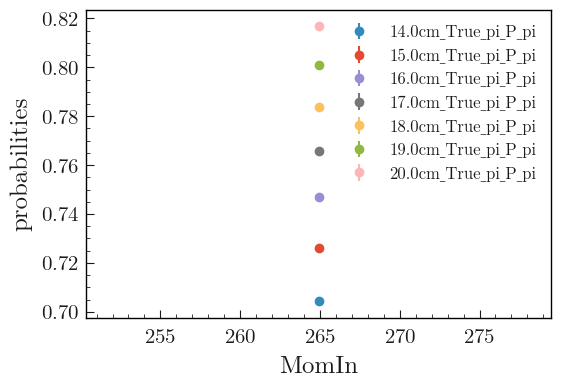

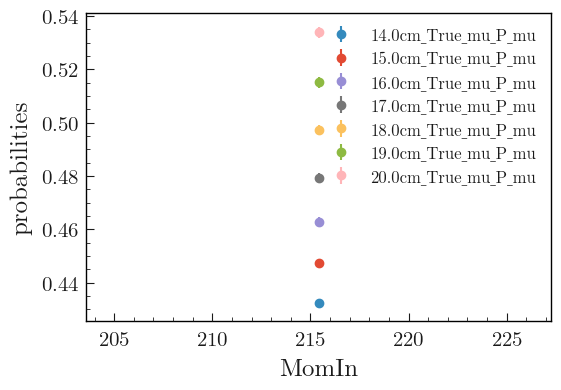

In [140]:
plt.figure(dpi=100)
particles = ['e','kaon','pi','mu']
distances = ['14.0','15.0','16.0','17.0','18.0','19.0','20.0']

for p in particles:
    plt.figure(dpi=100)
    for d in distances:
        
        for i in ['P_e','P_mu','P_pi','P_kaon','P_p']: 
            marker ='.'
            if f'_{p}' in i:
                marker ='o'
                # plt.hist(files[f'd_{d}'][f'p_{p}'].query('layer==0 and Gtime<0.7')['MomIn'])
                plot_profile(files[f'd_{d}'][f'p_{p}'].query(f'layer==0 and Gtime<{Gt_cuts[d]}'),
                             'MomIn',i,
                             200,10,(10,1000),(0,1),f'{d}cm_True_{p}',fmt=marker)
    # plt.ylim(0,1.1)
    plt.legend()
    plt.savefig(f'{fig_path}Ture_{p}_profile.pdf',bbox_inches='tight')


In [53]:
# hist2d = file["HitMap_layer0"]  # TH1F or TH1D

# values = hist2d.values()
# xedges = hist2d.axis(0).edges()
# yedges = hist2d.axis(1).edges()

# plt.figure(dpi =100)
# plt.pcolormesh(xedges, yedges, values.T, shading='auto')  
# plt.xlabel("X axis")
# plt.ylabel("Y axis")
# plt.title("2D Histogram")
# plt.colorbar(label="Counts")
# plt.show()
# hist2d = file["HitMap_layer1"]  # TH1F or TH1D

# values = hist2d.values()
# xedges = hist2d.axis(0).edges()
# yedges = hist2d.axis(1).edges()

# plt.figure(dpi =100)
# plt.pcolormesh(xedges, yedges, values.T, shading='auto')  
# plt.xlabel("X axis")
# plt.ylabel("Y axis")
# plt.title("2D Histogram")
# plt.colorbar(label="Counts")
# plt.show()